In [124]:
from google.colab import files
uploaded_train = files.upload()


Saving Bank_Personal_Loan_Modelling-1.csv to Bank_Personal_Loan_Modelling-1 (2).csv


In [0]:
####################  QUESTIONS ##############################


## Read the column description and ensure you understand each attribute well
## Study the data distribution in each attribute, share your findings. (5 points)
## Get the target column distribution. Your comments
## Split the data into training and test set in the ratio of 70:30 respectively
## Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
## Print the confusion matrix for all the above models (5 points)
##  7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [456]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.4
SciPy version: 1.3.1
IPython version: 5.5.0
scikit-learn version: 0.21.3
-------------------------


In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
import io
from datetime import datetime
import time


In [0]:
data_raw  = pd.read_csv(io.BytesIO(uploaded_train['Bank_Personal_Loan_Modelling-1.csv']))

In [459]:
## cheking the shape of data

data_raw.shape

(5000, 14)

In [0]:
data_train = data_raw.copy(deep = True)   ## creating the back up copy for further use

In [461]:
## viewing the random 5 sample records

data_train.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4078,4079,36,12,58,91320,1,3.6,2,0,0,0,0,0,0
3371,3372,44,18,33,95351,3,0.5,2,0,0,0,0,0,0
1313,1314,52,27,78,92008,4,3.6,3,141,0,0,0,1,0
1138,1139,30,6,83,93101,4,3.4,1,0,0,1,0,1,0
1120,1121,34,8,38,94304,2,2.0,3,0,0,0,0,1,1


In [462]:
##### UNDERSTANDING THE VARAIABLES TYPES #########################

## we have all the columns as numeric - int or float
## Also we dont have any null values
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 4999 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [0]:
## ID column has nothing to do with the prediction wheteher any depositor will accept loan or not , so droping this column

data_train = data_train.drop('ID',axis=1)

In [464]:
## checking the 3 random samples after droping the ID column

data_train.head(3) 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,NaN,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [465]:
data_train.shape  ## as per the shape of data it has 5000 records and 13 attributes

(5000, 13)

In [0]:
#######################  IDENTIFYING THE NULL VALUES #############################

In [467]:
data_train.isnull().sum().sort_values(ascending=False)

CCAvg                 1
CreditCard            0
Online                0
CD Account            0
Securities Account    0
Personal Loan         0
Mortgage              0
Education             0
Family                0
ZIP Code              0
Income                0
Experience            0
Age                   0
dtype: int64

In [468]:
data_train.isnull().sum(axis=0)

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 1
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [469]:
data_train.isnull().values.any()

True

In [0]:
data_train.fillna(method='bfill',inplace=True)

In [473]:
data_train.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.5,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


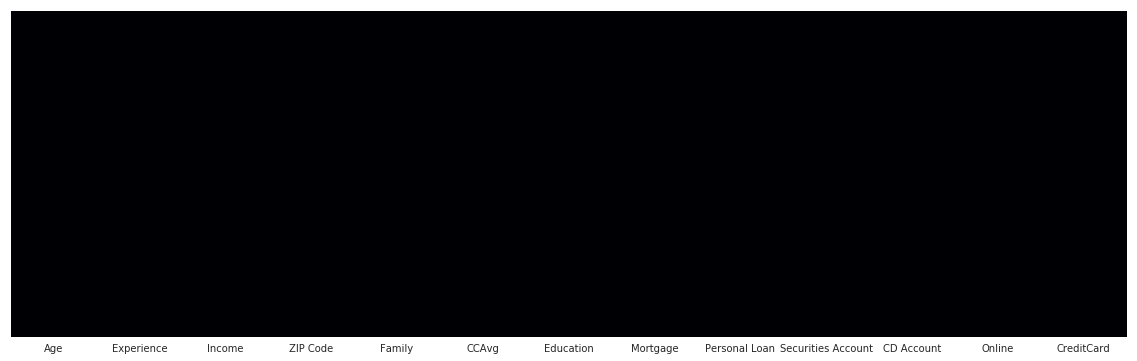

In [474]:
## finding the null and missing values in the database
plt.figure(figsize=(20,6))
sns.heatmap(data_train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='inferno') 

## since we don't have any null values so graph shows uniform color for all attributes

In [0]:
############################################  VISUALLY FEATURE ANALYSIS ################################################################################

In [476]:

data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937918,1.747663,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [0]:
# Age - min and max values lies within IQR , uppper and lower limit so we don't have any outlayers. Major customers lies in the age group greater than 30 means 
#       majority of them are from working group and retired group(in majortiy). 
# Experience - min value is in negative which could not be possible so either we will make then zero or adjust with the bucketing method. We have customers with experiences of
#       min 1 to max 45 yrs.
# Income - shows 75% at 98 while the max values is 224 , it is slightly right skewed.SO most customers we can say belong to middle and upper class
# Zip code- its the representation of of the customer location 
# Family size - categorocal value - values are 1,2,3,4
# CCAvg  - almost symmetric distribution of data. Skewed towards right so majority of customers belong to group having average credit card usage as $1500 means their 
#          financial status is average and above.
# Educatuion - categorocal value - 1: Undergrad; 2: Graduate; 3: Advanced/Professional
# Mortgage - Moajority of customers dont't have  mortgage value and only few have mortgage value equal and above $100000.  Customers in majority represents their own house 
# Personal Loan	- categorocal value - 1 and 0 - Target column
# Securities Account	-categorocal value - 1 and 0
# CD Account-	categorocal value - 1 and 0
# Online	-categorocal value - 1 and 0
# CreditCard-categorocal value - 1 and 0


In [0]:
##################  CHECKING THE DISTRIBUTION OF CONTONOUS COLUMNS ####################################

## OBSERVATION

# Age columns has three sub distribution indcating three age intervals
# Experience has two sub clusters with second distribution more towrds higher education
# Income is right skewed showing mid range and low ragnge income classes more
# Avg. spending on credit cards per month ($000) is more towards lower range 
# Value of house mortgage is showing normal distribution with major outliers at higher range.

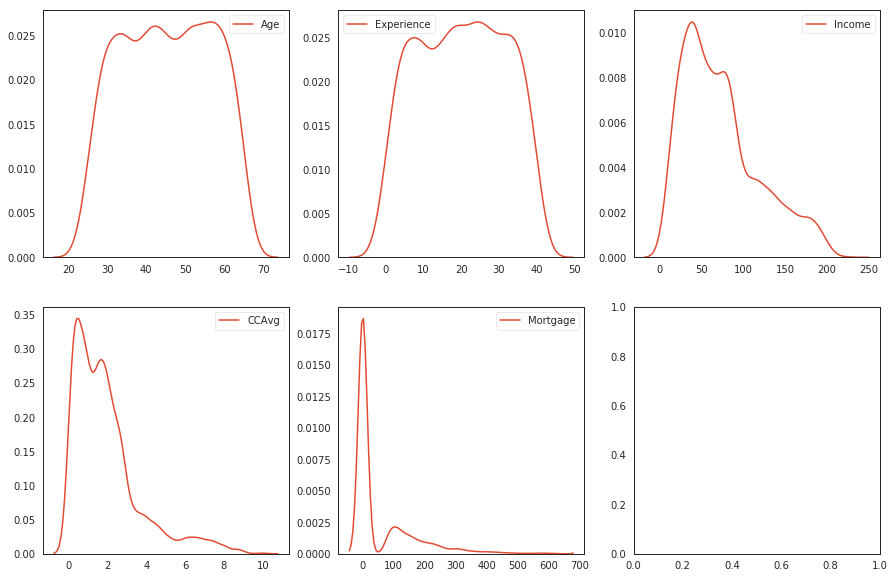

In [478]:
fig, qaxis = plt.subplots(2,3,figsize=(15,10))
col_d = ['Age','Experience','Income','CCAvg','Mortgage']
i=0
j=0
k=0
for i in range (len(col_d)):  
  sns.kdeplot(data_train[col_d[i]], ax = qaxis[j,k])
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0
    
 

In [0]:
##################  CHECKING THE DISTRIBUTION OF CATEGORICAL COLUMNS  ####################################


                       ############ OBSERVATION ############

## Family size of the customer is showing equal distribution for all the classes of 1,2,3,4 with more count of size =1
## Education also have equal distribution with undergraduate at high range
## Customers with dont have Securities Account are more
## Customers with dont have CD Account are more
## Customers using internet banking facilities are more
## Customer using a credit card issued by UniversalBank are less

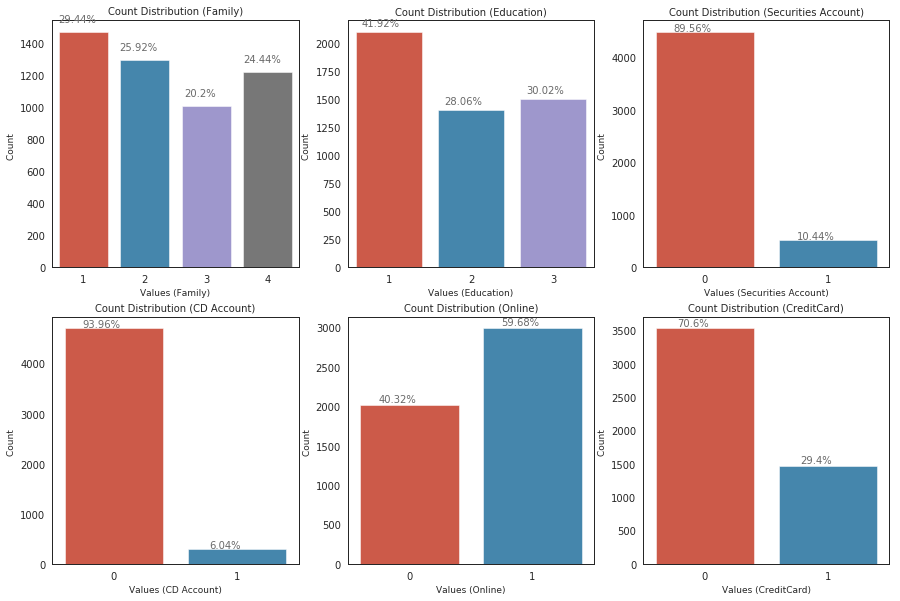

In [480]:
col_c = ['Family','Education','Securities Account','CD Account','Online','CreditCard']
fig, qaxis = plt.subplots(2,3,figsize=(15,10))
i=0
j=0
k=0
l=0
for i in range (len(col_c)):  
  dd=sns.countplot(x=data_train[col_c[i]], ax = qaxis[j,k])
  dd.set_title('Count Distribution ({})'.format(col_c[i]), fontsize = 10)
  dd.set_xlabel('Values ({})'.format(col_c[i]), fontsize = 9)
  dd.set_ylabel('Count ', fontsize = 9)
  # find the values and append to list
  totals = []
  for l in dd.patches:
    totals.append(l.get_height())

  # set individual bar lables using above list
  total = sum(totals)

  # set individual bar lables using above list
  for l in dd.patches:
    # get_x pulls left or right; get_height pushes up or down
    dd.text(l.get_x()+.30,l.get_height()+80,str(round((l.get_height()/total)*100, 2))+'%',ha = 'center', va = 'center', fontsize=10,color='dimgrey', rotation=0)
  
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0
    
    
    
    

In [481]:
## now will see the distribution of data for Target column
data_train['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

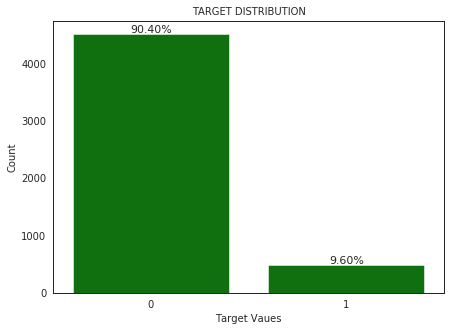

In [659]:
plt.subplots(1,1,figsize=(7,5)) 

g = sns.countplot(x=data_train['Personal Loan'], data=data_train, color='green')

g.set_title("TARGET DISTRIBUTION", fontsize = 10)
g.set_xlabel("Target Vaues", fontsize = 10)
g.set_ylabel("Count", fontsize = 10)

for p in g.patches:
    g.annotate('{:1.2f}%'.format(p.get_height()/len(data_train)*100), (p.get_x() + p.get_width() / 2.,
                p.get_height()+5),  ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points', fontsize=11)
   
plt.show()



In [0]:

# AGE - there is the equal distrbution of Loan accepting customers in all class intervals however maority of  Loan accepting customers are present
# in the 30 - 40 age interval
# Experience - there is the equal distrbution of Loan accepting customers in all class intervals
# Income($000)- there is the assymetric distrbution of Loan accepting customers in all class intervals.Majority are from $100000 to $200000
# Credi Card Average($000)- there is the equal distrbution of Loan accepting customers in all class intervals however maority of  Loan accepting customers are present in the $2000-$4000 interval
# Mortgage - if we look fot the distrbution of Loan accepting customers we will find majority of  Loan accepting customers lies below mortgage value less than $ 100000

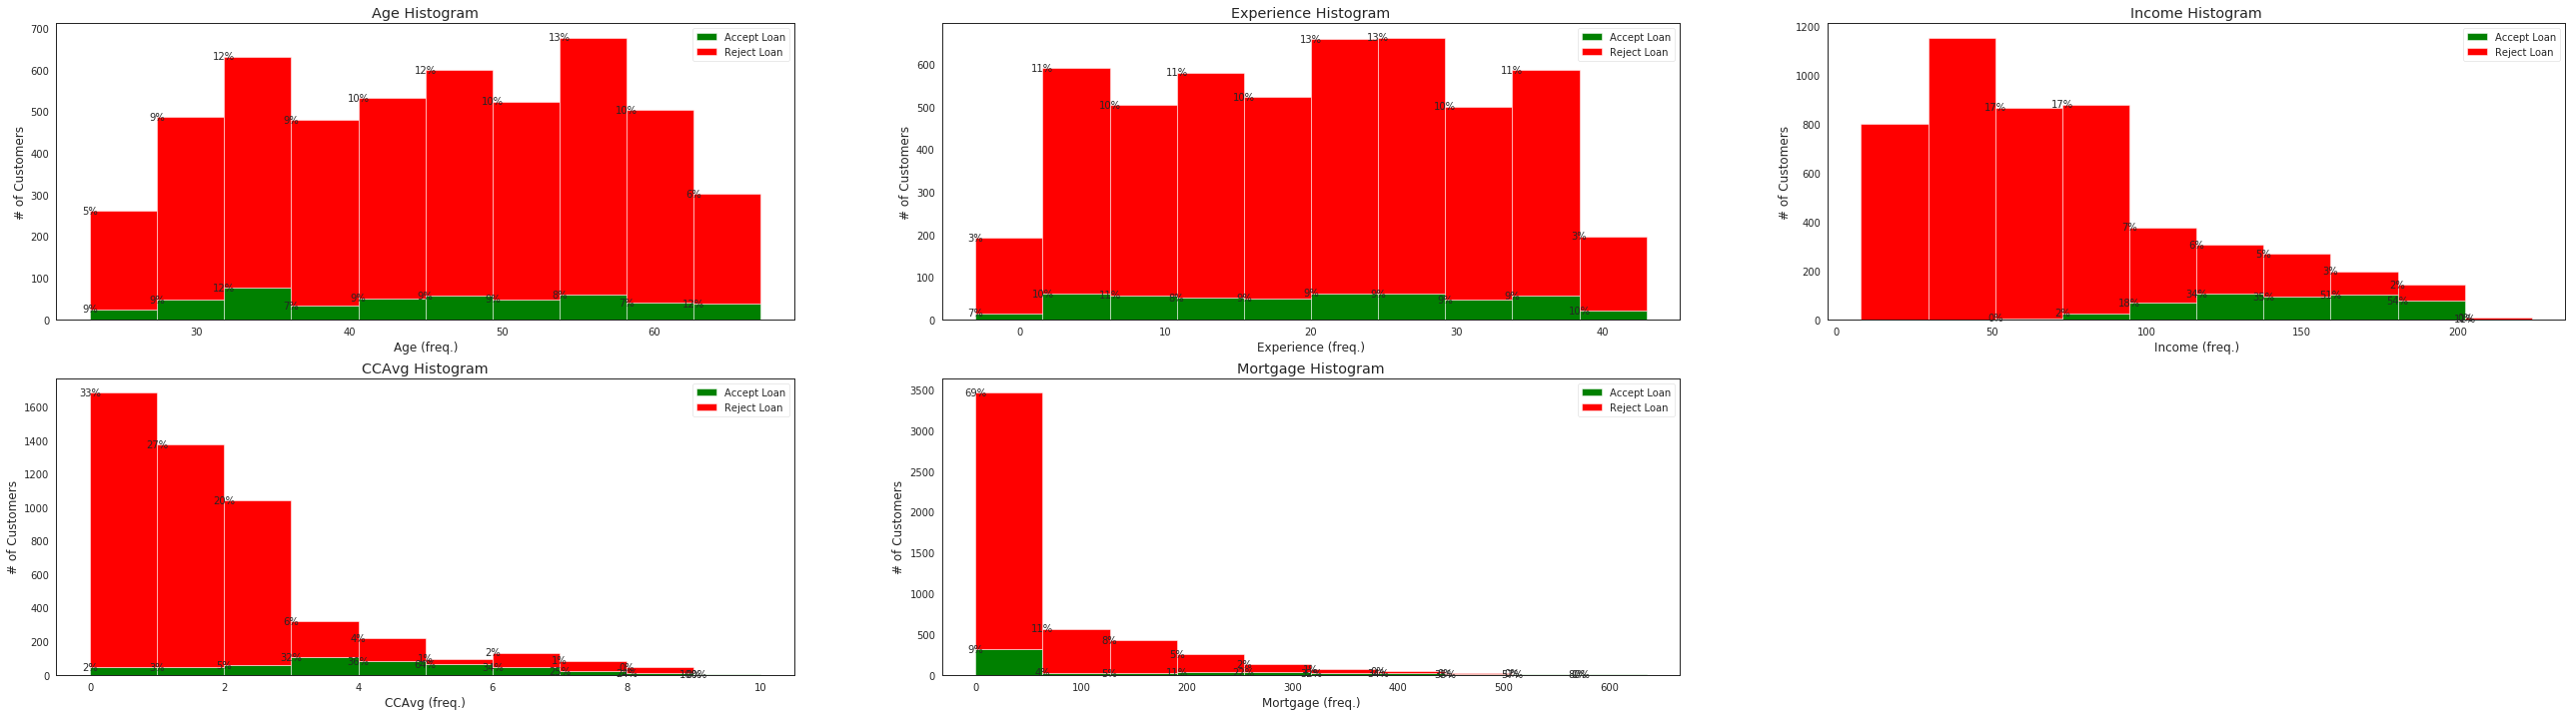

In [487]:
#graph distribution of quantitative data vs Personal Loan
plt.figure(figsize=[45,12])

dis_col = ['Age','Experience','Income','CCAvg','Mortgage']


c=231

for a in range(len(dis_col)):
  plt.subplot(c)
  d1 = plt.hist(x = [data_train[data_train['Personal Loan']==1][dis_col[a]], data_train[data_train['Personal Loan']==0][dis_col[a]]], 
         stacked=True, color = ['g','r'],label = ['Accept Loan','Reject Loan'])
  plt.title('{} Histogram'.format(dis_col[a]))
  plt.xlabel('{} (freq.)'.format(dis_col[a]))
  plt.ylabel('# of Customers')
  plt.legend()
  for i in range(len(d1[0][0])):
    if (d1[0][0][i] != 0.0 ):
      #plt.text(d[1][0]+.12,d[0][0],str(round(d[0][0])),fontsize=13)  ## xy
      plt.text(d1[1][i],d1[0][1][i],'{}%'.format(int((d1[0][1][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)  ## xy
      #print('{:1.2f}%'.format(round(d[0][1][i]/np.sum(d[0][1])*100)))
      plt.text(d1[1][i],d1[0][0][i],'{}%'.format(int((d1[0][0][i]/(d1[0][1][i])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)
      
  c=c+1
    

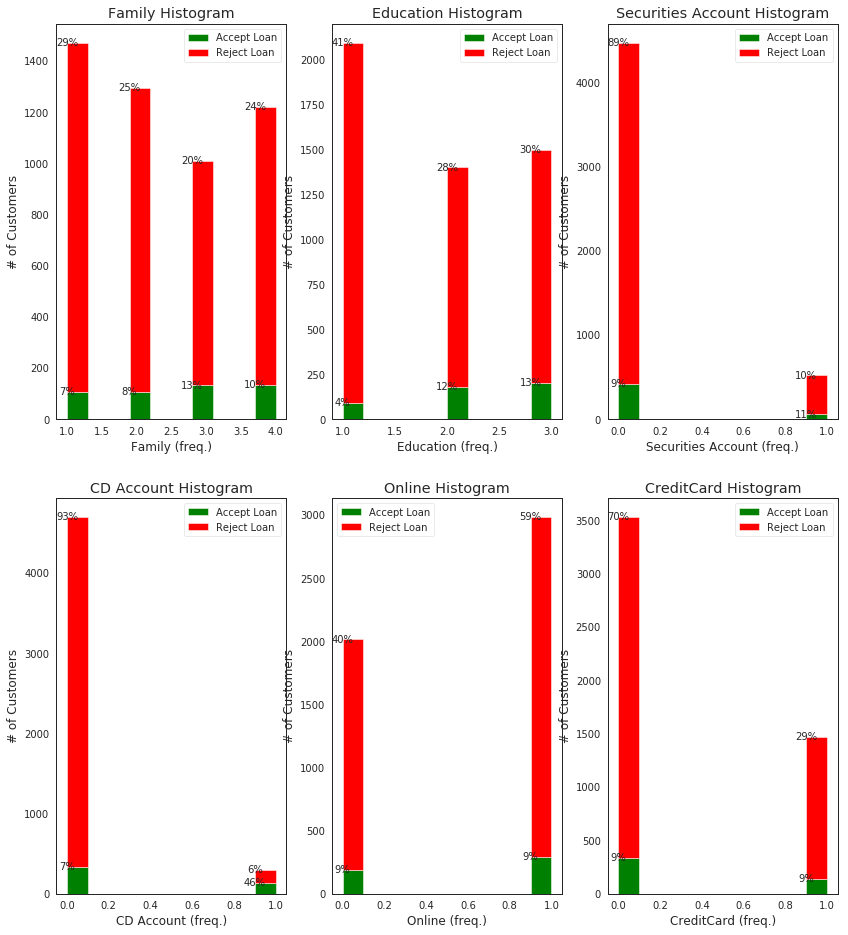

In [489]:
#graph distribution of categorical data vs Personal Loan
plt.figure(figsize=[14,16])

dis_col = ['Family','Education','Securities Account','CD Account','Online','CreditCard']


c=231

for a in range(len(dis_col)):
  plt.subplot(c)
  d1 = plt.hist(x = [data_train[data_train['Personal Loan']==1][dis_col[a]], data_train[data_train['Personal Loan']==0][dis_col[a]]], 
         stacked=True, color = ['g','r'],label = ['Accept Loan','Reject Loan'])
  plt.title('{} Histogram'.format(dis_col[a]))
  plt.xlabel('{} (freq.)'.format(dis_col[a]))
  plt.ylabel('# of Customers')
  plt.legend()
  for i in range(len(d1[0][0])):
    if (d1[0][0][i] != 0.0 ):
      #plt.text(d[1][0]+.12,d[0][0],str(round(d[0][0])),fontsize=13)  ## xy
      plt.text(d1[1][i],d1[0][1][i],'{}%'.format(int((d1[0][1][i]/np.sum(d1[0][1])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)  ## xy
      #print('{:1.2f}%'.format(round(d[0][1][i]/np.sum(d[0][1])*100)))
      plt.text(d1[1][i],d1[0][0][i],'{}%'.format(int((d1[0][0][i]/(d1[0][1][i])*100))), ha = 'center', va = 'center',fontsize=10,rotation=0)
      
  c=c+1
    
 #### INFERENCE ############

## Family - all family with different sizes equally have loan accepting numbers of customers
## Education - graduate and advanced have  more loan accepting numbers of customers
## Securities Account - customers don't having security account with the bank have more loan accepting numbers of customers
## CD Account - customers don't having certificate of deposit (CD) account with the bank have more loan accepting numbers of customers
## Online -customers using internet banking facilities more have more loan accepting numbers of customers
## CreditCard -customers using a credit card issued by UniversalBankhave have more loan accepting numbers of customers

In [0]:
## Family - all family with different sizes equally have loan accepting numbers of customers
## Education - graduate and advanced have  more loan accepting numbers of customers
## Securities Account - customers don't having security account with the bank have more loan accepting numbers of customers
## CD Account - customers don't having certificate of deposit (CD) account with the bank have more loan accepting numbers of customers
## Online -customers using internet banking facilities more have more loan accepting numbers of customers
## CreditCard -customers using a credit card issued by UniversalBankhave have more loan accepting numbers of customers

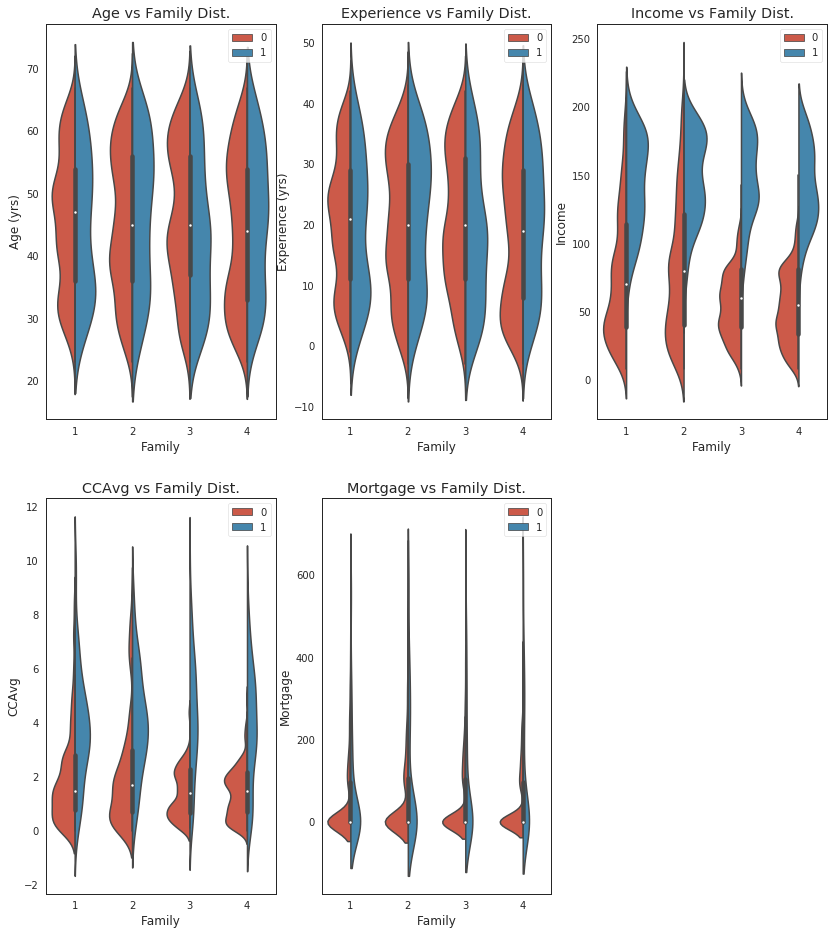

In [492]:
#graph distribution of quantitative data vs Personal Loan
plt.figure(figsize=[14,16])


plt.subplot(231)
sns.violinplot(x = 'Family', y = 'Age', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Age vs Family Dist.')
plt.ylabel('Age (yrs)')
plt.xlabel('Family')
plt.legend()


plt.subplot(232)
sns.violinplot(x = 'Family', y = 'Experience', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Experience vs Family Dist.')
plt.ylabel('Experience (yrs)')
plt.xlabel('Family')
plt.legend()


plt.subplot(233)
sns.violinplot(x = 'Family', y = 'Income', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Income vs Family Dist.')
plt.ylabel('Income')
plt.xlabel('Family')
plt.legend()


plt.subplot(234)
sns.violinplot(x = 'Family', y = 'CCAvg', hue = 'Personal Loan', data = data_train, split = True)
plt.title('CCAvg vs Family Dist.')
plt.ylabel('CCAvg')
plt.xlabel('Family')
plt.legend()

plt.subplot(235)
sns.violinplot(x = 'Family', y = 'Mortgage', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Mortgage vs Family Dist.')
plt.ylabel('Mortgage')
plt.xlabel('Family')
plt.legend()




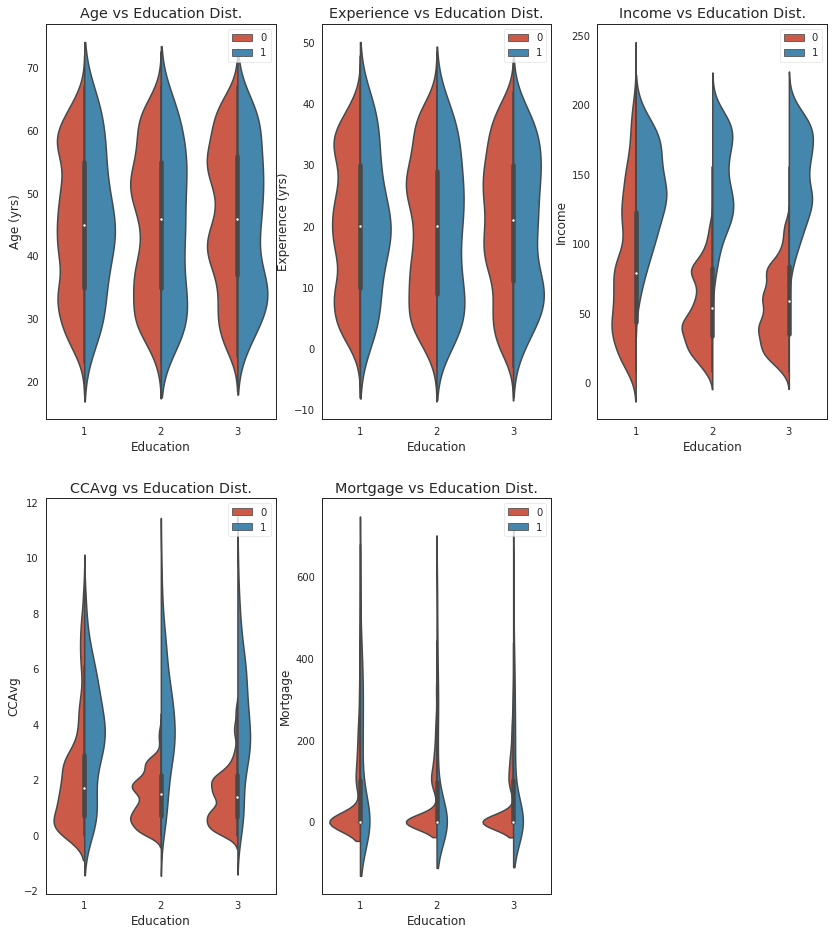

In [493]:
#graph distribution of quantitative data vs Personal Loan
plt.figure(figsize=[14,16])


plt.subplot(231)
sns.violinplot(x = 'Education', y = 'Age', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Age vs Education Dist.')
plt.ylabel('Age (yrs)')
plt.xlabel('Education')
plt.legend()


plt.subplot(232)
sns.violinplot(x = 'Education', y = 'Experience', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Experience vs Education Dist.')
plt.ylabel('Experience (yrs)')
plt.xlabel('Education')
plt.legend()


plt.subplot(233)
sns.violinplot(x = 'Education', y = 'Income', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Income vs Education Dist.')
plt.ylabel('Income')
plt.xlabel('Education')
plt.legend()


plt.subplot(234)
sns.violinplot(x = 'Education', y = 'CCAvg', hue = 'Personal Loan', data = data_train, split = True)
plt.title('CCAvg vs Education Dist.')
plt.ylabel('CCAvg')
plt.xlabel('Education')
plt.legend()

plt.subplot(235)
sns.violinplot(x = 'Education', y = 'Mortgage', hue = 'Personal Loan', data = data_train, split = True)
plt.title('Mortgage vs Education Dist.')
plt.ylabel('Mortgage')
plt.xlabel('Education')
plt.legend()




In [0]:
##################### HANDLING THE OUTLIERS ##############################

In [495]:
#Capping the outlier rows with Percentiles
#upper_lim_q = data_train['Mortgage'].quantile(.90)
#lower_lim_q = data_train['Mortgage'].quantile(.10)
#Dropping the outlier rows with standard deviation
col_d = ['Age','Experience','Income','CCAvg','Mortgage']
i=0
for i in range(len(col_d)):
  factor = 2
  upper_lim = data_train[col_d[i]].mean () + data_train[col_d[i]].std () * factor
  lower_lim = data_train[col_d[i]].mean () - data_train[col_d[i]].std () * factor
  #print(data_train['Mortgage'].describe())
  print('upper_lim for the column {0} is = {1}'.format(col_d[i],upper_lim))
  print('lower_lim for the column {0} is = {1}'.format(col_d[i],lower_lim))
  print('percentage of upper limit outliers for the column {0} is {1} %'.format(col_d[i],(data_train[col_d[i]][(data_train[col_d[i]] > upper_lim)==True].count()/data_train[col_d[i]].count())*100))
  print('percentage of lower limit outliers for the column {0} is {1} %'.format(col_d[i],(data_train[col_d[i]][(data_train[col_d[i]] < lower_lim)==True].count()/data_train[col_d[i]].count())*100))
  
  print('\n*************************************************************************\n')


#print('upper_lim_q =',upper_lim_q)

## capping the outliers

data_train[col_d[i]][(data_train[col_d[i]] > upper_lim)==True] = upper_lim
data_train[col_d[i]][(data_train[col_d[i]] < lower_lim)==True] = lower_lim 


upper_lim for the column Age is = 68.26473126108539
lower_lim for the column Age is = 22.412068738914616
percentage of upper limit outliers for the column Age is 0.0 %
percentage of lower limit outliers for the column Age is 0.0 %

*************************************************************************

upper_lim for the column Experience is = 43.040507362241144
lower_lim for the column Experience is = -2.831307362241141
percentage of upper limit outliers for the column Experience is 0.0 %
percentage of lower limit outliers for the column Experience is 0.08 %

*************************************************************************

upper_lim for the column Income is = 165.84165864217266
lower_lim for the column Income is = -18.293258642172674
percentage of upper limit outliers for the column Income is 5.52 %
percentage of lower limit outliers for the column Income is 0.0 %

*************************************************************************

upper_lim for the column CCAvg is 

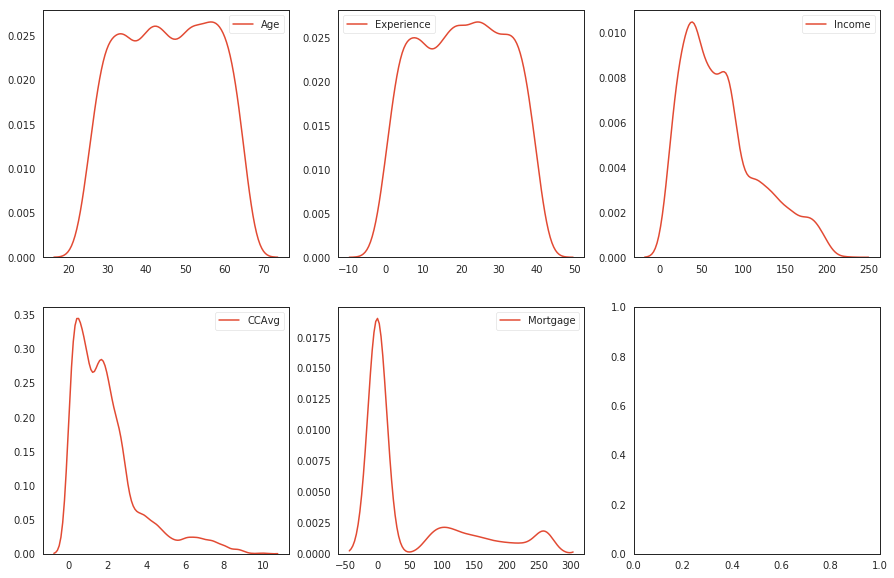

In [496]:
################# CHECKING THE DISTRIBUTION AGAIN ###############################

fig, qaxis = plt.subplots(2,3,figsize=(15,10))
col_d = ['Age','Experience','Income','CCAvg','Mortgage']
i=0
j=0
k=0
for i in range (len(col_d)):  
  sns.kdeplot(data_train[col_d[i]], ax = qaxis[j,k])
  k=k+1
  j=j
  if k==3:
    j=j+1
    k=0
    
 

In [0]:
################################  LABEL ENCODING ###########################################

In [0]:
data_train['AgeBin'] = pd.cut(data_train['Age'],7)

In [504]:
print(data_train['AgeBin'].unique())

grp = data_train.groupby('AgeBin')
print(grp['Age'].count().sum())
print(grp['Age'].count())

[(22.956, 29.286], (41.857, 48.143], (35.571, 41.857], (29.286, 35.571], (48.143, 54.429], (60.714, 67.0], (54.429, 60.714]]
Categories (7, interval[float64]): [(22.956, 29.286] < (29.286, 35.571] < (35.571, 41.857] <
                                    (41.857, 48.143] < (48.143, 54.429] < (54.429, 60.714] <
                                    (60.714, 67.0]]
5000
AgeBin
(22.956, 29.286]    488
(29.286, 35.571]    786
(35.571, 41.857]    722
(41.857, 48.143]    881
(48.143, 54.429]    782
(54.429, 60.714]    794
(60.714, 67.0]      547
Name: Age, dtype: int64


In [0]:
data_train['IncomeBin'] = pd.qcut(data_train['Income'],10)

In [506]:
print(data_train['IncomeBin'].unique())

grp = data_train.groupby('IncomeBin')
print(grp['Income'].count().sum())
print(grp['Income'].count())

[(42.0, 52.0], (33.0, 42.0], (7.999, 22.0], (88.3, 113.0], (22.0, 33.0], (64.0, 78.0], (78.0, 88.3], (145.0, 224.0], (113.0, 145.0], (52.0, 64.0]]
Categories (10, interval[float64]): [(7.999, 22.0] < (22.0, 33.0] < (33.0, 42.0] < (42.0, 52.0] < ... <
                                     (78.0, 88.3] < (88.3, 113.0] < (113.0, 145.0] <
                                     (145.0, 224.0]]
5000
IncomeBin
(7.999, 22.0]     507
(22.0, 33.0]      522
(33.0, 42.0]      520
(42.0, 52.0]      453
(52.0, 64.0]      548
(64.0, 78.0]      469
(78.0, 88.3]      481
(88.3, 113.0]     521
(113.0, 145.0]    495
(145.0, 224.0]    484
Name: Income, dtype: int64


In [0]:
data_train['ExperienceBin'] = pd.cut(data_train['Experience'],6)

In [508]:
print(data_train['ExperienceBin'].unique())

grp = data_train.groupby('ExperienceBin')
print(grp['Experience'].count().sum())
print(grp['Experience'].count())

[(-3.046, 4.667], (12.333, 20.0], (4.667, 12.333], (20.0, 27.667], (35.333, 43.0], (27.667, 35.333]]
Categories (6, interval[float64]): [(-3.046, 4.667] < (4.667, 12.333] < (12.333, 20.0] <
                                    (20.0, 27.667] < (27.667, 35.333] < (35.333, 43.0]]
5000
ExperienceBin
(-3.046, 4.667]      519
(4.667, 12.333]      988
(12.333, 20.0]      1035
(20.0, 27.667]       913
(27.667, 35.333]    1031
(35.333, 43.0]       514
Name: Experience, dtype: int64


In [0]:
# bin_dict = {'T':1, 'F':0, 'Y':1, 'N':0}

# Maping the category values in our dict
# df_train['bin_3'] = df_train['bin_3'].map(bin_dict)

In [0]:
#code categorical data
label = LabelEncoder()
data_train['AgeBin_Code'] = label.fit_transform(data_train['AgeBin'])
data_train['ExperienceBin_Code'] = label.fit_transform(data_train['ExperienceBin'])
data_train['IncomeBin_Code'] = label.fit_transform(data_train['IncomeBin'])


In [511]:
data_train.sample(1)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,AgeBin,IncomeBin,ExperienceBin,AgeBin_Code,ExperienceBin_Code,IncomeBin_Code
1018,39,15,61,90018,2,0.6,3,127.0,0,0,0,0,0,"(35.571, 41.857]","(52.0, 64.0]","(12.333, 20.0]",2,2,4


In [0]:
data_train_dummy = pd.get_dummies(data = data_train,columns=['Family','Education','Securities Account','CD Account','Online','CreditCard'],dummy_na=False)

In [513]:
data_train_dummy.sample(2)

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,AgeBin,IncomeBin,ExperienceBin,AgeBin_Code,ExperienceBin_Code,IncomeBin_Code,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
994,32,8,42,90650,1.8,0.0,0,"(29.286, 35.571]","(33.0, 42.0]","(4.667, 12.333]",1,1,2,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
4658,36,11,69,95929,2.1,0.0,0,"(35.571, 41.857]","(64.0, 78.0]","(4.667, 12.333]",2,1,5,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1


In [0]:
data_train_dummy = data_train_dummy.drop(columns=['Age','Experience','ZIP Code','Income','AgeBin','IncomeBin','ExperienceBin'],axis=1) ## 

In [515]:
data_train_dummy.sample(2)

,CCAvg,Mortgage,Personal Loan,AgeBin_Code,ExperienceBin_Code,IncomeBin_Code,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
255,0.7,138.0,0,6,5,2,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1
3723,1.6,82.0,0,4,3,3,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0


In [0]:
#################################  FEATURE SELECTION ####################################################



In [0]:
                            ############### 1- UNIVARIATE SELECTION ##############################

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [542]:
dt = data_train_dummy.select_dtypes(include=['int64','float64'])
col = dt.columns
for i in range(len(col)):
  print('{0} = {1}'.format(col[i],dt[col[i]].min()))
  if dt[col[i]].min() < 0:
    dt[col[i]][(dt[col[i]]<0)==True] = 0
    print('after adjustment value for {0} = {1}'.format(col[i],dt[col[i]].min()))
  print('\n*****************************')

CCAvg = 0.0

*****************************
Mortgage = 0.0

*****************************
Personal Loan = 0

*****************************
AgeBin_Code = 0

*****************************
ExperienceBin_Code = 0

*****************************
IncomeBin_Code = 0

*****************************


In [0]:
X1 = data_train_dummy.drop('Personal Loan',axis=1)  #independent columns
y1 = data_train_dummy['Personal Loan']    #target column i.e price range

In [0]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1,y1)

In [545]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                   Specs        Score
1               Mortgage  6348.988954
4         IncomeBin_Code  1700.773646
0                  CCAvg  1060.568470
15          CD Account_1   470.177616
9            Education_1    64.380154
14          CD Account_0    30.224274
11           Education_3    28.475495
10           Education_2    18.384223
7               Family_3    14.818646
5               Family_1     9.216045
6               Family_2     3.015407
8               Family_4     2.626018
13  Securities Account_1     2.158275
3     ExperienceBin_Code     0.452024
2            AgeBin_Code     0.310945
12  Securities Account_0     0.251590
16              Online_0     0.117602
17              Online_1     0.079453
19          CreditCard_1     0.027705
18          CreditCard_0     0.011537


In [0]:

#################### 2- Feature Importance ####################################

from sklearn.ensemble import ExtraTreesClassifier

In [547]:
model = ExtraTreesClassifier()
model.fit(X1,y1)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.16593503 0.02302769 0.03531027 0.0348001  0.39066094 0.02914957
 0.02749589 0.01660536 0.01992314 0.06520452 0.02740229 0.03810443
 0.00533123 0.00741451 0.03115408 0.0442855  0.01016071 0.00816521
 0.01023705 0.00963248]


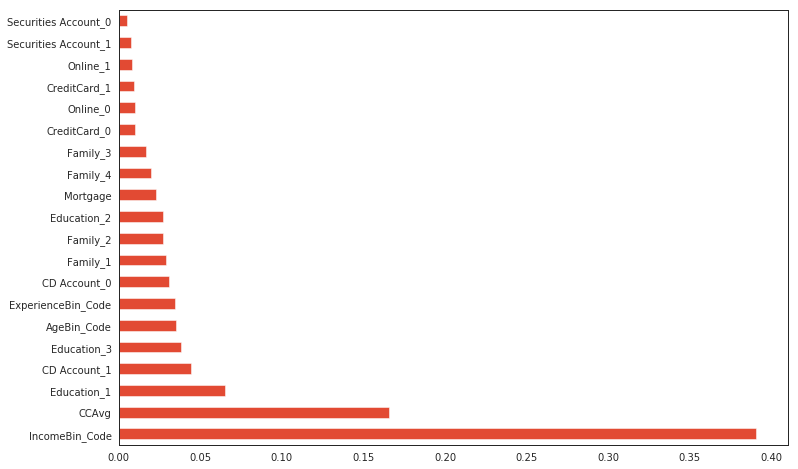

In [548]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [0]:

#################### 3- Correlation Matrix with Heatmap ####################################

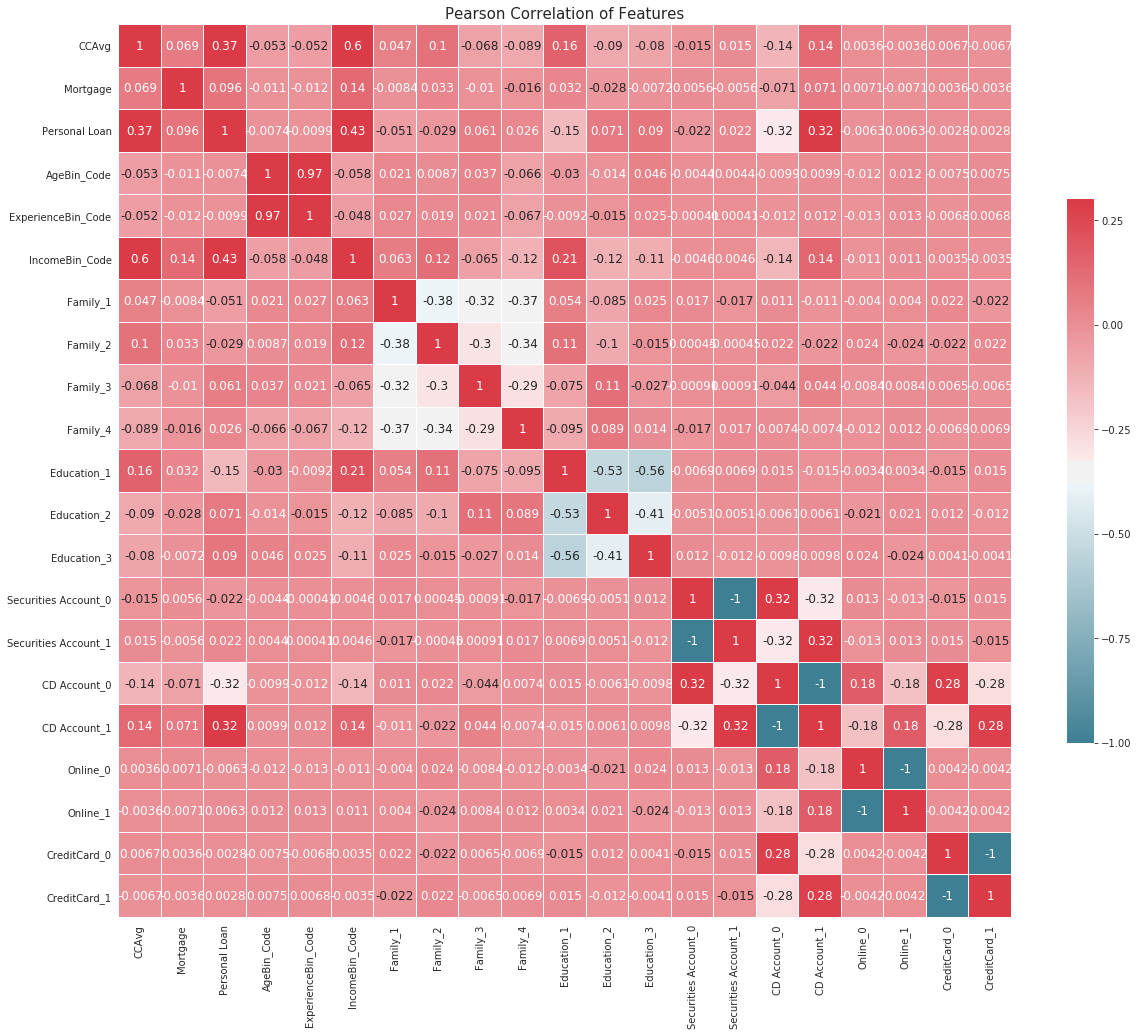

In [549]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    fig , ax = plt.subplots(figsize =(20,20))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(df.corr(),cmap = colormap,square=True,cbar_kws={'shrink':.5 }, ax=ax,annot=True,linewidths=0.1,vmax=0.3, linecolor='white',annot_kws={'fontsize':12 } )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train_dummy)



In [0]:
## the attributes which have least importance are - ExperienceBin_Code,AgeBin_Code,Securities Account_0,Online_0,Online_1,CredtCard_0,Credit_card_1
## We will drop these columns 

In [551]:
data_train_dummy.columns

Index(['CCAvg', 'Mortgage', 'Personal Loan', 'AgeBin_Code',
       'ExperienceBin_Code', 'IncomeBin_Code', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Education_1', 'Education_2', 'Education_3',
       'Securities Account_0', 'Securities Account_1', 'CD Account_0',
       'CD Account_1', 'Online_0', 'Online_1', 'CreditCard_0', 'CreditCard_1'],
      dtype='object')

In [0]:
data_train_dummy.drop(columns=['Personal Loan','ExperienceBin_Code','AgeBin_Code','Securities Account_0','Online_0','Online_1','CreditCard_0','CreditCard_1'],axis=1,inplace=True)

In [0]:
#plt.subplots(figsize =(14, 12))
#corr=data_train_dummy.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)]= True
#sns.heatmap(corr,annot=True,annot_kws={'fontsize':10 },square=True,cbar_kws={'shrink':.5 },linewidths=0.1,vmax=0.3,linecolor='white',mask=mask)
#plt.title('Pearson Correlation of Features', y=1.05, size=8)

In [658]:
data_train_dummy.head(1)

,CCAvg,Mortgage,IncomeBin_Code,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_1,CD Account_0,CD Account_1
0,1.5,0.0,3,0,0,0,1,1,0,0,1,1,0


In [0]:
X = np.array(data_train_dummy)

In [0]:

Y=np.array(data_train['Personal Loan'])

In [0]:

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(X, Y, test_size=0.3,random_state = 0,shuffle = True, stratify = Y)
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_sample(train1_x,train1_y)

In [0]:
################## SMOTING ##############################

In [591]:
df = pd.Series(train1_y)
df_sm = pd.Series(y_train_sm)
print(df.value_counts())
print(df_sm.value_counts())

0    3164
1     336
dtype: int64
1    3164
0    3164
dtype: int64


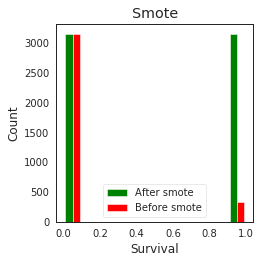

In [592]:
plt.subplot(231)
plt.hist(x = [df_sm,df], 
         color=['green','red'],label = ['After smote','Before smote'])
plt.title('Smote')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.legend()

In [0]:
  #Machine Learning Algorithm (MLA) Selection and Initialization
  
  MLA =  [
      
      
      
 #Ensemble Methods                                              
          ensemble.AdaBoostClassifier(),                                 
          ensemble.BaggingClassifier(),                                  
          ensemble.ExtraTreesClassifier(),                               
          ensemble.GradientBoostingClassifier(),                         
          ensemble.RandomForestClassifier(), 
		     
		      #ensemble.RandomForestRegressor(max_features=2, min_samples_split=4, n_estimators=50, min_samples_leaf=2),
          # ensemble.GradientBoostingRegressor(loss='quantile', learning_rate=0.0001, n_estimators=50, max_features='log2', min_samples_split=2, max_depth=1),




          #Gaussian Processes                                            
          gaussian_process.GaussianProcessClassifier(),                  

          #GLM                                                           
          linear_model.LogisticRegressionCV(),                           
          linear_model.PassiveAggressiveClassifier(),                    
          linear_model.RidgeClassifierCV(),                              
          linear_model.SGDClassifier(),                                  
          linear_model.Perceptron(),                                     

          #Navies Bayes                                                  
          naive_bayes.BernoulliNB(),                                     
          naive_bayes.GaussianNB(),                                      

          #Nearest Neighbor                                              
          neighbors.KNeighborsClassifier(),                              

          #SVM                                                           
          svm.SVC(probability=True),                                     
          svm.NuSVC(probability=True),                                   
          svm.LinearSVC(),                                               

          #Trees                                                         
          tree.DecisionTreeClassifier(),                                 
          tree.ExtraTreeClassifier(),                                    
          #tree.DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3),
          #ensemble.AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=1000),
		  
		  
          #Discriminant Analysis                                         
          discriminant_analysis.LinearDiscriminantAnalysis(),            
          discriminant_analysis.QuadraticDiscriminantAnalysis(),         


          #xgboost: http://xgboost.readthedocs.io/en/latest/model.html 
      
          XGBClassifier() 
		  
		  
		  
		
      
  ]

In [0]:
   MLA_columns = ['MLA_Name']
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [647]:
MLA_predict = pd.DataFrame({"Actual_Data_Target":test1_y})  
MLA_predict.head(2)

,Actual_Data_Target
0,1
1,0


In [0]:
#################################### MODEL 1 ==> WITHOUT SCALING ############################################################

In [0]:
row_index = 0
for alg in MLA:
    
    from datetime import datetime
    import time

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name
    #MLA_compare.loc[row_index, 'MLA_Parameters'] = str(alg.get_params())   
 
    d = alg.fit(X_train_sm, y_train_sm)
    MLA_predict[MLA_name] = alg.predict(test1_x)
    #MLA_compare.loc[row_index, 'MLA_Intercept'] =  alg.intercept_
    MLA_compare.loc[row_index, 'Actual_Y_Shape'] =test1_y.shape
    MLA_compare.loc[row_index, 'confusion_matrix'] = str(metrics.confusion_matrix(test1_y,alg.predict(test1_x)))
    MLA_compare.loc[row_index, 'accuracy_score'] = metrics.accuracy_score(test1_y,alg.predict(test1_x))
    confusion_matrix = metrics.confusion_matrix(test1_y,alg.predict(test1_x))
    MLA_compare.loc[row_index, 'True_Positive_Rate\n[Sensitivity/Recall]'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
    MLA_compare.loc[row_index, 'Precision'] = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
    MLA_compare.loc[row_index, 'True_Negatve_Rate\n[Specificity]'] = confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1])    
    MLA_compare.loc[row_index, 'mean_absolute_error'] = metrics.mean_absolute_error(test1_y, alg.predict(test1_x))
    MLA_compare.loc[row_index, 'mean_squared_error'] = metrics.mean_squared_error(test1_y, alg.predict(test1_x))
    MLA_compare.loc[row_index, 'root_mean_squared_error'] = np.sqrt(metrics.mean_squared_error(test1_y, alg.predict(test1_x)))
    #MLA_compare.loc[row_index, 'explained_variance_score'] = explained_variance_score(test1_y, alg.predict(test1_x))
    MLA_compare.loc[row_index, 'Timestamp'] = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    if MLA_name in ['DecisionTreeRegressor']:
      import graphviz
      feature_nm = list(data_train_dummy.columns)
      class_nm = ['Loan_Accepted', 'Loan_Rejected']
      dot_data = tree.export_graphviz(d, out_file=None,feature_names=feature_nm,class_names=class_nm,filled=True, rounded=True,special_characters=True) 
      graph_tree_regressor = graphviz.Source(dot_data)
   
    row_index+=1

In [650]:

fmt = '%Y-%m-%d %H:%M:%S'
max_tstmp = datetime.strptime(MLA_compare['Timestamp'].max(), fmt)
min_tstmp = datetime.strptime(MLA_compare['Timestamp'].min(), fmt)


td = max_tstmp - min_tstmp
td_mins = int(round(td.total_seconds() / 60))

print('The model performance is approx. %s minutes' % td_mins)

The model performance is approx. 2 minutes


In [651]:
MLA_compare.sort_values(by = ['accuracy_score','Precision'], ascending = False, inplace = True)
MLA_compare

,MLA_Name,Actual_Y_Shape,confusion_matrix,accuracy_score,True_Positive_Rate [Sensitivity/Recall],Precision,True_Negatve_Rate [Specificity],mean_absolute_error,mean_squared_error,root_mean_squared_error,Timestamp
1,BaggingClassifier,1500.0,[[1352 4]\n [ 17 127]],0.986000,0.881944,0.969466,0.881944,0.014000,0.014000,0.118322,2019-09-04 04:21:23
4,RandomForestClassifier,1500.0,[[1351 5]\n [ 17 127]],0.985333,0.881944,0.962121,0.881944,0.014667,0.014667,0.121106,2019-09-04 04:21:23
17,DecisionTreeClassifier,1500.0,[[1351 5]\n [ 22 122]],0.982000,0.847222,0.960630,0.847222,0.018000,0.018000,0.134164,2019-09-04 04:23:08
3,GradientBoostingClassifier,1500.0,[[1338 18]\n [ 9 135]],0.982000,0.937500,0.882353,0.937500,0.018000,0.018000,0.134164,2019-09-04 04:21:23
21,XGBClassifier,1500.0,[[1337 19]\n [ 10 134]],0.980667,0.930556,0.875817,0.930556,0.019333,0.019333,0.139044,2019-09-04 04:23:08
2,ExtraTreesClassifier,1500.0,[[1347 9]\n [ 22 122]],0.979333,0.847222,0.931298,0.847222,0.020667,0.020667,0.143759,2019-09-04 04:21:23
18,ExtraTreeClassifier,1500.0,[[1343 13]\n [ 26 118]],0.974000,0.819444,0.900763,0.819444,0.026000,0.026000,0.161245,2019-09-04 04:23:08
5,GaussianProcessClassifier,1500.0,[[1307 49]\n [ 15 129]],0.957333,0.895833,0.724719,0.895833,0.042667,0.042667,0.206559,2019-09-04 04:22:52
13,KNeighborsClassifier,1500.0,[[1301 55]\n [ 11 133]],0.956000,0.923611,0.707447,0.923611,0.044000,0.044000,0.209762,2019-09-04 04:22:54
14,SVC,1500.0,[[1301 55]\n [ 16 128]],0.952667,0.888889,0.699454,0.888889,0.047333,0.047333,0.217562,2019-09-04 04:22:57


Text(0, 0.5, 'Algorithm')

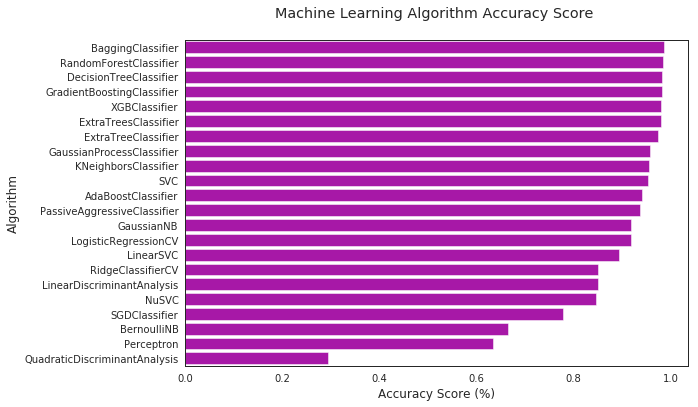

In [652]:
plt.figure(figsize=(9,6))
sns.barplot(x='accuracy_score', y ='MLA_Name', data = MLA_compare , color = 'm')
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [0]:
##################### COMPARISION of accuracy , precision , recall and RMSE #######################################

No handles with labels found to put in legend.


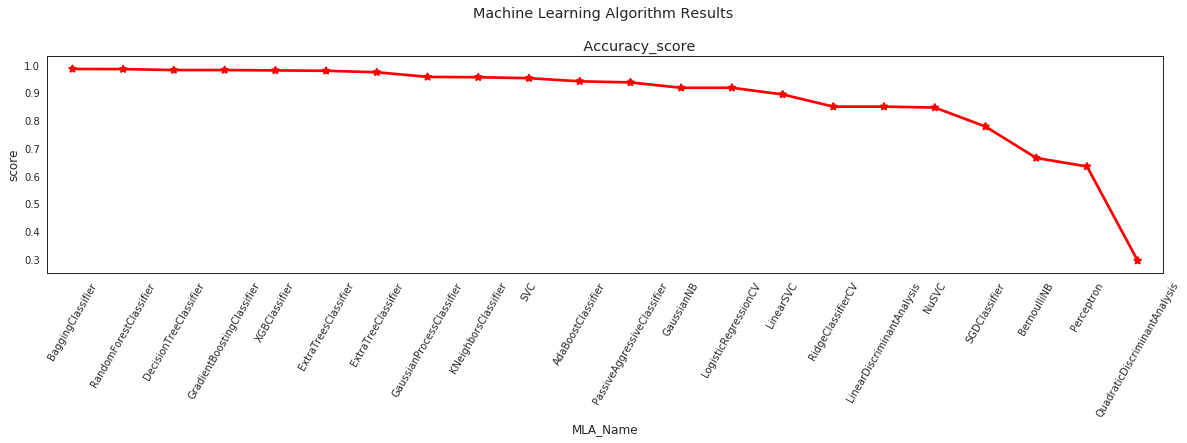

In [654]:
plt.figure(figsize=(20,4))
sns.pointplot(y='accuracy_score', x ='MLA_Name', data = MLA_compare , color = 'r',markers=["*"],label = 'accuracy_score')

plt.title('Machine Learning Algorithm Results \n\n               Accuracy_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend(loc='bottom left', frameon=False)

No handles with labels found to put in legend.


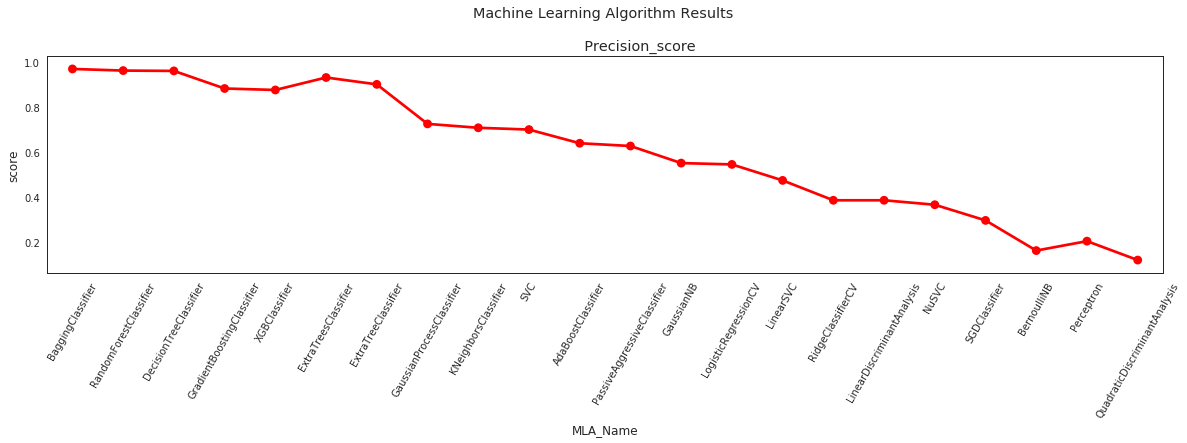

In [655]:
plt.figure(figsize=(20,4))
sns.pointplot(y='Precision', x ='MLA_Name', data = MLA_compare , color = 'r',markers=["o"],label = 'Precision')


plt.title('Machine Learning Algorithm Results \n\n               Precision_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend(loc='bottom left', frameon=False)





No handles with labels found to put in legend.


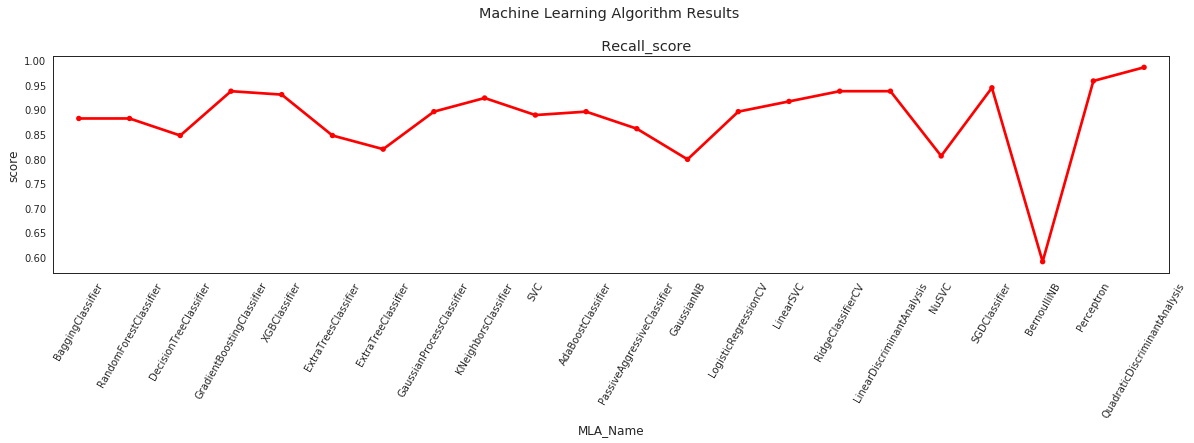

In [660]:
plt.figure(figsize=(20,4))
sns.pointplot(y='True_Positive_Rate\n[Sensitivity/Recall]', x ='MLA_Name', data = MLA_compare , color = 'r',markers=["."],label = 'Recall')


plt.title('Machine Learning Algorithm Results \n\n               Recall_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend(loc='bottom left', frameon=False)



No handles with labels found to put in legend.


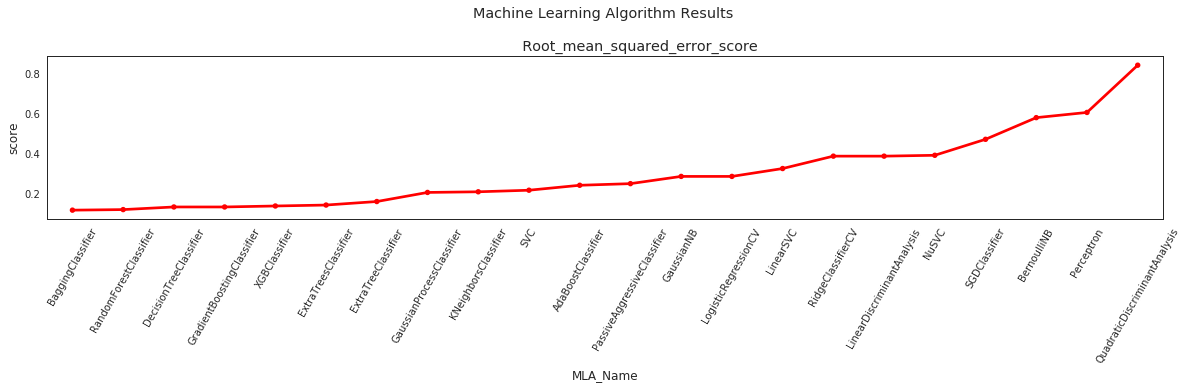

In [657]:
plt.figure(figsize=(20,3))
sns.pointplot(y='root_mean_squared_error', x ='MLA_Name', data = MLA_compare , color = 'r',markers=["."],label = 'RMSE')


plt.title('Machine Learning Algorithm Results \n\n               Root_mean_squared_error_score')
plt.xlabel('MLA_Name')
plt.ylabel('score')
plt.xticks(rotation=60)
plt.legend(loc='bottom left', frameon=False)



In [0]:
# that will be good which have high accuracy score, precision score and recall value and minimum RMSE.
# so Bagging Classifier is the best classification algorithm